### Importing libraries

In [1]:
import os
import string
import math
import numpy as np
import statistics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import homogeneity_score
import matplotlib.pyplot as plt

### Traversing files in folder

In [2]:
x_part = []
y_part = []

for _, _, files in os.walk("./Datasets/Question-6"):
    for file in files:
        file = "/"+file
#         print(file)
        with open("./Datasets/Question-6/"+file, 'r', encoding="utf8", errors='ignore') as f:
            temp = ""
            line = f.read()
            # line = line.decode()
            line = line.replace('\n', ' ')
            line = line.strip('\t')
            temp += line
        temp = temp.translate(str.maketrans('', '', string.punctuation))
        temp = temp.lower()
        # print(temp)
        x_part.append(temp)
        label = file.split('_')[1]
        label = label[0]
        # print("label :"+str(label))
        y_part.append(label)

### Vectorization using Term-frequency Inverse document frequency vectorizer

In [3]:
tfvec = TfidfVectorizer(stop_words='english')
train_vec = tfvec.fit_transform(x_part)
train_vec = train_vec.toarray()

In [4]:
dim = train_vec.shape[1]
k_clusters = 5

### Function for majority voting

In [5]:
def find_max_mode(list1):
    list_table = statistics._counts(list1)
    len_table = len(list_table)

    if len_table == 1:
        max_mode = statistics.mode(list1)
    else:
        new_list = []
        for i in range(len_table):
            new_list.append(list_table[i][0])
        max_mode = max(new_list) # use the max value here
    return max_mode

## K means convergence loop

The initialized k means vectors are normalized to unit vectors as the vectors generated by TfIdf vectorizer are already unit vectors.

In [8]:
tolerance = 0.001
g_dict = {}
trials = 20
best_list = []
best_acc = 0
samples = train_vec.shape[0]
rand_score = []
acc_score = []
h_score = []
predictions=[-1]*train_vec.shape[0]

for trial in range(trials):
    k_dict={}
    k_means = np.random.random(size=(k_clusters, dim))
    for row in range(k_clusters):
        k_means[row,:] /= np.linalg.norm(k_means[row,:])
    while True:
        my_mean = [-1]*samples
        points_in_mean = {new_list: [] for new_list in range(k_clusters)} 
        for point in range(samples):
            min_dist = math.inf
            assgn_centroid = -1
            for mean in range(k_means.shape[0]):
                dist = np.linalg.norm(train_vec[point,:] - k_means[mean,:])
                if dist < min_dist:
                    min_dist = dist
                    assgn_centroid = mean
            my_mean[point] = assgn_centroid
            points_in_mean[assgn_centroid].append(point)
        g_dict = points_in_mean
        new_means = np.zeros(k_means.shape)
        for point in range(train_vec.shape[0]):
            assgn_centroid = my_mean[point]
            new_means[assgn_centroid] += train_vec[point]
        
        for mean in range(new_means.shape[0]):
            new_means[mean] /= len(points_in_mean[mean])
        distances = np.linalg.norm(k_means-new_means, axis=1)
        dist = sum(distances)
        k_means = new_means
        if dist < tolerance:
            break
    predictions=[-1]*train_vec.shape[0]
    for mean in range(k_clusters):
        actual_labels = [y_part[g_dict[mean][ind]] for ind in range(len(g_dict[mean]))]
        label = find_max_mode(actual_labels)
        for point in g_dict[mean]:
            predictions[point] = label
    acc = accuracy_score(y_part, predictions)*100
    acc_score.append(acc)
    r_score = adjusted_rand_score(y_part, predictions)*100
    rand_score.append(r_score)
    hs = homogeneity_score(y_part, predictions)*100
    h_score.append(hs)
    print("trial #"+str(trial+1)+" accuracy :"+str(acc)+" rscore:"+str(r_score)+" homogenetiy:"+str(hs))
    if acc > best_acc:
        best_acc = acc
        best_list = predictions



trial #1 accuracy :84.52173913043478 rscore:65.55336259288491 homogenetiy:69.75828016233989
trial #2 accuracy :83.07246376811594 rscore:62.96224877633352 homogenetiy:67.65145062226507
trial #3 accuracy :68.6376811594203 rscore:41.85480728967525 homogenetiy:47.799664779073034
trial #4 accuracy :83.59420289855073 rscore:64.33389351355187 homogenetiy:69.04562909620135
trial #5 accuracy :69.33333333333334 rscore:51.41854196336472 homogenetiy:56.83619315448251
trial #6 accuracy :63.65217391304348 rscore:37.83956556395028 homogenetiy:45.76636842605942
trial #7 accuracy :71.47826086956522 rscore:47.64327266488647 homogenetiy:59.12104823344756
trial #8 accuracy :83.94202898550725 rscore:67.37819714821192 homogenetiy:69.41010909126423
trial #9 accuracy :87.8840579710145 rscore:74.45532804547292 homogenetiy:75.09552531523342
trial #10 accuracy :60.86956521739131 rscore:35.06229427892893 homogenetiy:40.79799928046891
trial #11 accuracy :81.04347826086956 rscore:60.55956890207462 homogenetiy:62.49

### Rand index adjusted for chance, Homogeneity score and Accuracy vs random trial plot

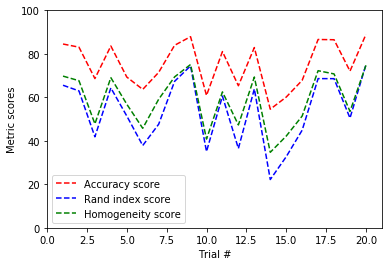

In [10]:
plt.plot([i for i in range(1,trials+1)], acc_score, 'r--', label="Accuracy score")
plt.plot([i for i in range(1,trials+1)], rand_score, 'b--', label="Rand index score")
plt.plot([i for i in range(1,trials+1)], h_score, 'g--', label="Homogeneity score")
plt.legend(loc='best')
plt.axis([0, trials+1, 0, 100])
plt.xlabel('Trial #')
plt.ylabel('Metric scores')
# plt.figure(figsize=(20,17))
plt.show()